<p align="center"><h1 align="center">QMSS5074GR <br> Projects in Advanced Machine Learning <br>Spring 2024 <br> FINAL PROJECT Part 1<br>Stanford Sentiment Treebank - Movie Review Classification Competition [GROUP Assignment]</h1>

---
<br>

#### **Unis** : ql2510 ndc2140
#### **Full names** : Qiankun Li, Nicholas Choong
#### **AI Model Share Usernames**: liqiankun
#### **Link Public Github repository** : https://github.com/artemlevinh/Movie-Review-Classification-with-Deep-Learning-
#### **Team member Contribution Percentages** : 60(ql2510)/40(ndc2140)

## Stanford Sentiment Treebank - Movie Review Classification Competition

## **Instructions: [Total 15 Points for this part]**
1.   Get data in and set up X_train / X_test / y_train
2.   Preprocess data using Sklearn TFIDF Vectorizer/ Write and Save Preprocessor function
3. Fit model on preprocessed data and save preprocessor function and model
4. Generate predictions from X_test data and submit model to competition
5. Repeat submission process to improve place on leaderboard



## 1. Get data in and set up X_train, X_test, y_train objects

In [ ]:
#install aimodelshare library
!pip install -q aimodelshare

In [ ]:
# Get competition data
from aimodelshare import download_data
download_data('public.ecr.aws/y2e2a1d6/sst2_competition_data-repository:latest')


Data downloaded successfully.


In [ ]:
# Set up X_train, X_test, and y_train_labels objects
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=Warning)

X_train=pd.read_csv("sst2_competition_data/X_train.csv")
X_test=pd.read_csv("sst2_competition_data/X_test.csv")
y_train_labels=pd.read_csv("sst2_competition_data/y_train_labels.csv")


X_train.head()

,text
0,The Rock is destined to be the 21st Century 's...
1,The gorgeously elaborate continuation of `` Th...
2,Singer/composer Bryan Adams contributes a slew...
3,Yet the act is still charming here .
4,Whether or not you 're enlightened by any of D...


In [ ]:
import pandas as pd

def to_series(df):
    # Check if the DataFrame has only one column
    if len(df.columns) == 1:
        # Convert to Series and return
        return df.iloc[:, 0]
    else:
        # Return the DataFrame as is
        return df

In [ ]:
X_train=to_series(X_train)
X_test=to_series(X_test)
y_train_labels=to_series(y_train_labels)

In [ ]:
X_train

0       The Rock is destined to be the 21st Century 's...
1       The gorgeously elaborate continuation of `` Th...
2       Singer/composer Bryan Adams contributes a slew...
3                    Yet the act is still charming here .
4       Whether or not you 're enlightened by any of D...
                              ...                        
6915                                      A real snooze .
6916                                       No surprises .
6917    We 've seen the hippie-turned-yuppie plot befo...
6918    Her fans walked out muttering words like `` ho...
6919                                  In this case zero .
Name: text, Length: 6920, dtype: object

##2.   Preprocess data and Analyze


In [ ]:
# Build a Document-Term Matrix (DTM) out of words in the training set
# Remove stop words that occur too frequently to be useful, and
# Use Term Frequency - Inverse Document Frequency (TF-IDF) formula to weight by how common words are generally

from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Fit the model and transform the training data into a DTM
X_train_tfidf = vectorizer.fit_transform(X_train)

# Print the shape and type of the TF-IDF matrix to understand the transformation
print("Shape of X_train_tfidf:", X_train_tfidf.shape)
print("Type of X_train_tfidf:", type(X_train_tfidf))

# Print a sample of the feature names/terms learned by the vectorizer
print("Sample features:", vectorizer.get_feature_names_out()[:10])  # Adjust as needed to view more or fewer features

Shape of X_train_tfidf: (6920, 13504)
Type of X_train_tfidf: <class 'scipy.sparse._csr.csr_matrix'>
Sample features: ['000' '10' '100' '101' '103' '105' '10th' '11' '110' '112']


In [ ]:
# Write function to transform data with preprocessor
# New samples will be put into a DTM based on vocabularly from training set

from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TfidfVectorizer with English stop words
vectorizer = TfidfVectorizer(stop_words='english')

# Fit the vectorizer to the training data to learn the vocabulary
vectorizer.fit(X_train)  # X_train must be your training data set

def preprocessor(data):
    """
    Transform the provided data using the trained TfidfVectorizer.

    Args:
    data (pandas.Series): A series containing textual data to be transformed.

    Returns:
    scipy.sparse.csr.csr_matrix: The transformed data in the TF-IDF weighted DTM format.
    """
    return vectorizer.transform(data)

# Now use this function to transform X_train and X_test
# and print the shapes of the resulting matrices
print("Shape of Transformed X_train:", preprocessor(X_train).shape)
print("Shape of Transformed X_test:", preprocessor(X_test).shape)

Shape of Transformed X_train: (6920, 13504)
Shape of Transformed X_test: (1821, 13504)


In [ ]:
y_train_labels

0       Positive
1       Positive
2       Positive
3       Positive
4       Positive
          ...   
6915    Negative
6916    Negative
6917    Positive
6918    Negative
6919    Negative
Name: label, Length: 6920, dtype: object

# 2b. Perform EDA and Visualizations (class balance, review lengths, word frequency per class, Wordcloud, etc)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# 1. Class Balance
def plot_class_balance(labels):
    class_counts = labels.value_counts()
    print("Class Counts:\n", class_counts)
    plt.figure(figsize=(8, 4))
    sns.countplot(labels)
    plt.title('Distribution of Classes')
    plt.xlabel('Sentiment')
    plt.ylabel('Number of Reviews')
    plt.show()


# 2. Review Lengths
def plot_review_lengths(reviews):
    review_lengths = reviews.apply(len)
    print("Review Lengths Stats:\n", review_lengths.describe())
    plt.figure(figsize=(10, 5))
    sns.histplot(review_lengths, bins=30, kde=True)
    plt.title('Distribution of Review Lengths')
    plt.xlabel('Length of Reviews')
    plt.ylabel('Number of Reviews')
    plt.show()


# 3. Word Frequency per Class
def plot_word_frequency(texts, labels, num_features=20):
    # Initialize the CountVectorizer with a limited number of features for simplicity
    vect = CountVectorizer(stop_words='english', max_features=num_features)

    # Separate texts by class for frequency analysis
    positive_texts = texts[labels == 'Positive']  # Filter texts where labels are 'Positive'
    negative_texts = texts[labels == 'Negative']  # Filter texts where labels are 'Negative'

    # Fit and transform the texts for positive class
    vect.fit(positive_texts)
    pos_dtm = vect.transform(positive_texts)
    pos_sum_words = pos_dtm.sum(axis=0)
    pos_words_freq = [(word, pos_sum_words[0, idx]) for word, idx in sorted(vect.vocabulary_.items(), key=lambda item: item[1])]

    # Fit and transform the texts for negative class
    vect.fit(negative_texts)
    neg_dtm = vect.transform(negative_texts)
    neg_sum_words = neg_dtm.sum(axis=0)
    neg_words_freq = [(word, neg_sum_words[0, idx]) for word, idx in sorted(vect.vocabulary_.items(), key=lambda item: item[1])]

    # Create DataFrames for each class
    df_pos = pd.DataFrame(pos_words_freq, columns=['word', 'positive_frequency']).nlargest(10, 'positive_frequency')
    df_neg = pd.DataFrame(neg_words_freq, columns=['word', 'negative_frequency']).nlargest(10, 'negative_frequency')

    # Print top 10 words for each class
    print("Top 10 Positive Words:")
    print(df_pos)
    print("\nTop 10 Negative Words:")
    print(df_neg)

    # Merge the two dataframes on the word column
    df_final = pd.merge(df_pos, df_neg, on="word", how="outer").fillna(0)

    # Plotting
    df_final.set_index('word').plot.barh(figsize=(12, 10), width=0.7)
    plt.xlabel('Frequency of Words')
    plt.title('Top Word Frequencies Per Class')
    plt.show()



# 4. Wordcloud
def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()



Class Counts:
 label
Positive    3610
Negative    3310
Name: count, dtype: int64


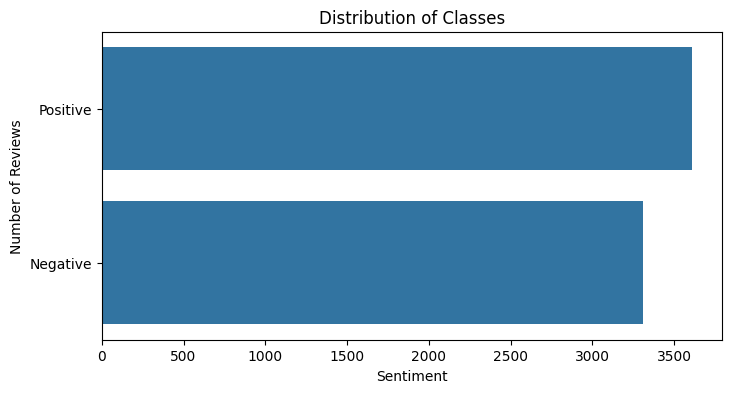

In [ ]:
plot_class_balance(y_train_labels)

Review Lengths Stats:
 count    6920.000000
mean      103.413295
std        51.374877
min         5.000000
25%        63.750000
50%        99.000000
75%       138.000000
max       267.000000
Name: text, dtype: float64


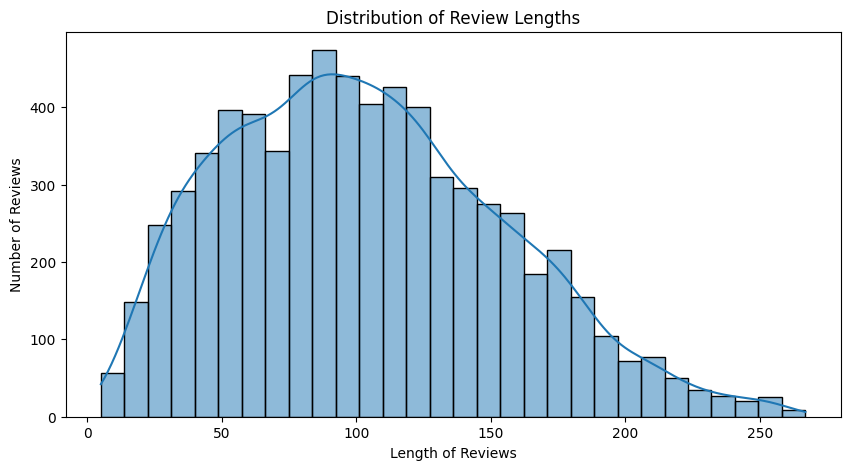

In [ ]:
plot_review_lengths(X_train)

Top 10 Positive Words:
        word  positive_frequency
6       film                 562
15     movie                 361
16     story                 164
10      like                 163
8       good                 148
7      funny                 131
2     comedy                 122
3   director                 111
12      love                 111
0       best                 109

Top 10 Negative Words:
          word  negative_frequency
14       movie                 479
7         film                 397
10        like                 260
9         just                 160
6         does                 145
1          bad                 136
17       story                 127
18        time                 110
3   characters                 106
4       comedy                 104


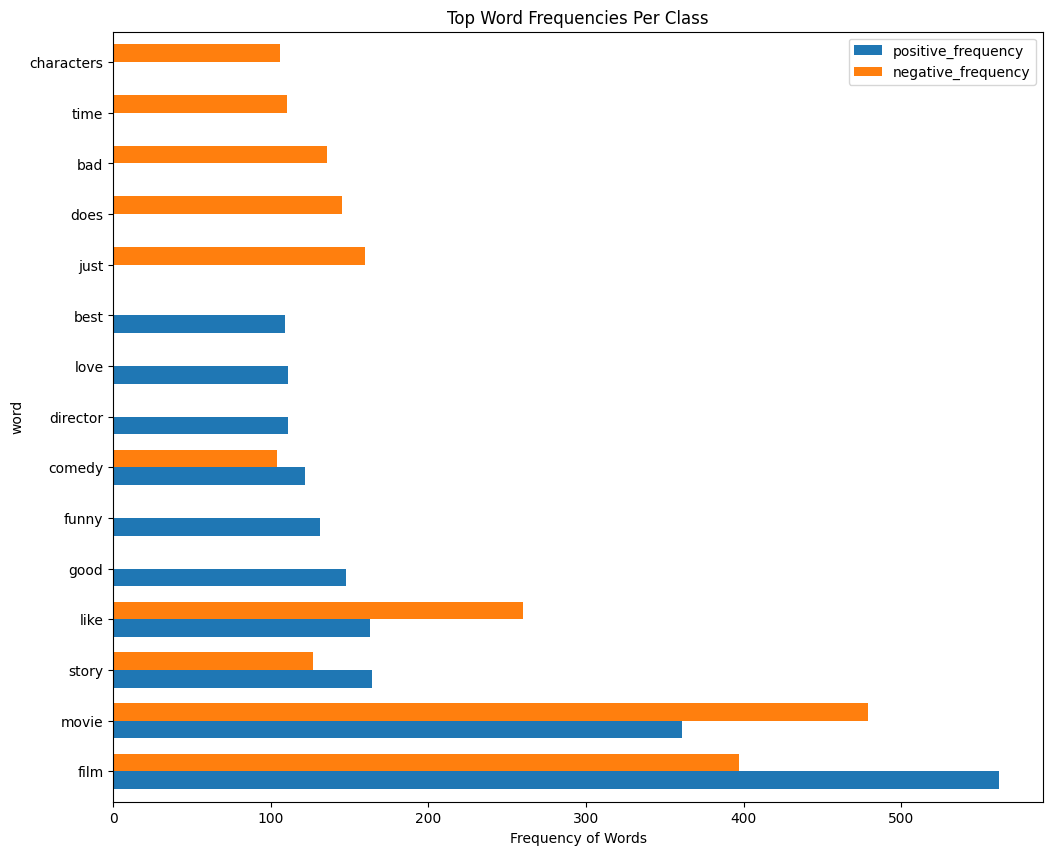

In [ ]:
plot_word_frequency(X_train, y_train_labels)

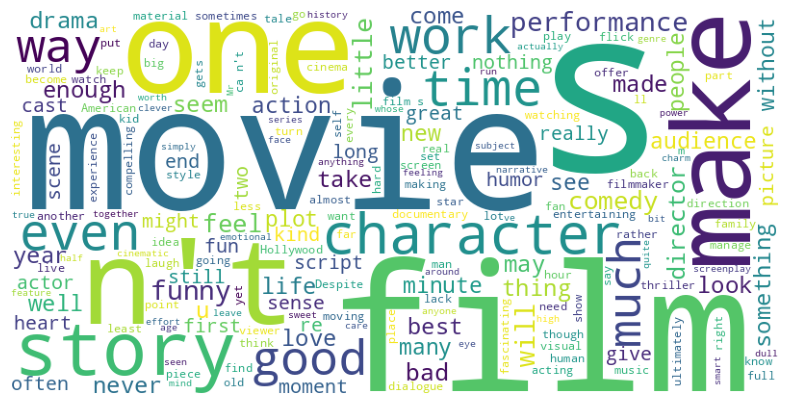

In [ ]:
generate_wordcloud(X_train)

If you think lemmatization, stemming and other text preprocessing should be performed, code here. You can also go back and include it in the preprocessing function if you want.

You are also free to include any extra features that you extract from the text to aid in modeling (Optional)

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import pandas as pd

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

class LemmatizedTokenizer:
    def __init__(self):
        self.lemmatizer = WordNetLemmatizer()
        self.stop_words = set(stopwords.words('english'))

    def __call__(self, doc):
        tokens = word_tokenize(doc.lower())
        return [self.lemmatizer.lemmatize(w) for w in tokens if w not in self.stop_words and w.isalpha()]

    def preprocessor(self, data):
        return self.vectorizer.transform(data)

    def fit(self, X_train):
        self.vectorizer = TfidfVectorizer(tokenizer=self)
        self.vectorizer.fit(X_train)

    def transform(self, data):
        return self.vectorizer.transform(data)

# Initialize LemmatizedTokenizer and fit the vectorizer to the training data
tokenizer = LemmatizedTokenizer()
tokenizer.fit(X_train)

# Transform X_train and X_test
X_train_tfidf = tokenizer.transform(X_train)
X_test_tfidf = tokenizer.transform(X_test)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


##3. Fit model on preprocessed data and save preprocessor function and model


## First Model: RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import joblib

# Initialize and train the RandomForestClassifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train_tfidf, y_train_labels)

# Perform cross-validation
cv_scores = cross_val_score(random_forest_model, X_train_tfidf, y_train_labels, cv=5, scoring='accuracy')
print("CV Scores:", cv_scores)
print("CV Average Score:", np.mean(cv_scores))
print("CV Standard Deviation:", np.std(cv_scores))

CV Scores: [0.7232659  0.74421965 0.72398844 0.72976879 0.69291908]
CV Average Score: 0.7228323699421966
CV Standard Deviation: 0.01674430888738842


#### Save preprocessor function to local "preprocessor.zip" file

In [ ]:
import aimodelshare as ai
import os

# Save the preprocessor function locally
ai.export_preprocessor(tokenizer.preprocessor, "")

Your preprocessor is now saved to 'preprocessor.zip'


#### Save model to local ".onnx" file

In [ ]:
# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

# Check how many preprocessed input features are there?
from skl2onnx.common.data_types import FloatTensorType

number_of_features = X_train_tfidf.shape[1]
feature_count= X_train_tfidf.shape[1]
initial_type = [('float_input', FloatTensorType([None, number_of_features]))]


onnx_model = model_to_onnx(random_forest_model, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

# Save the model to a local .onnx file
with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())



## 4. Generate predictions from X_test data and submit model to competition


In [ ]:
# Generate predicted values (a list of predicted labels "Positive" or "Negative") for Model 1
prediction_labels = random_forest_model.predict(X_test_tfidf)

# Convert the predicted labels to strings ("Positive" or "Negative") if they are not already
prediction_labels = ["Positive" if label == 'Positive' else "Negative" for label in prediction_labels]

print(prediction_labels)

['Positive', 'Negative', 'Positive', 'Positive', 'Negative', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Negative', 'Negative', 'Positive', 'Negative', 'Positive', 'Positive', 'Positive', 'Positive', 'Negative', 'Positive', 'Positive', 'Negative', 'Negative', 'Positive', 'Negative', 'Positive', 'Negative', 'Positive', 'Positive', 'Positive', 'Negative', 'Positive', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Positive', 'Positive', 'Positive', 'Negative', 'Positive', 'Positive', 'Negative', 'Negative', 'Positive', 'Positive', 'Negative', 'Positive', 'Positive', 'Positive', 'Positive', 'Negative', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Negative', 'Positive', 'Negative', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Negative', 'Negative', 'Positive', 'Positive', 'Positive', 'Negative', 'Positive', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Po

## 5. Repeat submission process to improve place on leaderboard


## Second Model: RandomForestClassifier(n_estimators=200,max_depth=None, min_samples_split=2,min_samples_leaf=1,max_features='auto',random_state=42)

In [ ]:
# Train and submit model 2 using same preprocessor (note that you could save a new preprocessor, but we will use the same one for this example).
from sklearn.ensemble import RandomForestClassifier

# Re-fit a better Random Forest model
new_random_forest_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='auto',
    random_state=42
)
new_random_forest_model.fit(X_train_tfidf, y_train_labels)

# Evaluate model
cv_scores = cross_val_score(new_random_forest_model, X_train_tfidf, y_train_labels, cv=5, scoring='accuracy')
print("CV Scores:", cv_scores)
print("CV Average Score:", np.mean(cv_scores))
print("CV Standard Deviation:", np.std(cv_scores))

CV Scores: [0.72398844 0.73988439 0.72976879 0.7333815  0.68713873]
CV Average Score: 0.7228323699421966
CV Standard Deviation: 0.018577094048004457


In [ ]:
# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

# Check how many preprocessed input features are there?
from skl2onnx.common.data_types import FloatTensorType

number_of_features = X_train_tfidf.shape[1]
feature_count= X_train_tfidf.shape[1]
initial_type = [('float_input', FloatTensorType([None, number_of_features]))]


onnx_model = model_to_onnx(new_random_forest_model, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

# Save the model to a local .onnx file
with open("model2.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())



## Third Model: Fine Tuned ForestTreeClassificer using Gride Search

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
import numpy as np

# Define the parameter grid
parameters = {
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), parameters, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train_tfidf, y_train_labels)

# Extract the best parameters and best model
best_params = grid_search.best_params_
best_random_forest_model = grid_search.best_estimator_

# Print best parameters
print("Best parameters found:", best_params)

# Use the best model to evaluate
cv_scores = cross_val_score(best_random_forest_model, X_train_tfidf, y_train_labels, cv=5, scoring='accuracy')
print("CV Scores:", cv_scores)
print("CV Average Score:", np.mean(cv_scores))
print("CV Standard Deviation:", np.std(cv_scores))

Best parameters found: {'min_samples_leaf': 2, 'min_samples_split': 5}
CV Scores: [0.73410405 0.73916185 0.72976879 0.7449422  0.69725434]
CV Average Score: 0.7290462427745664
CV Standard Deviation: 0.016684338031643483


In [ ]:
# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx


# complete

onnx_model = model_to_onnx(best_random_forest_model, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("gridmodel.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [ ]:
# If y_train_labels were used for training, look at some examples
print(y_train_labels.head())


0    Positive
1    Positive
2    Positive
3    Positive
4    Positive
Name: label, dtype: object


In [ ]:
#Submit Model 3:

#-- Generate predicted values (a list of predicted labels "real" or "fake")
prediction_labels = best_random_forest_model.predict(X_test_tfidf)



In [ ]:
# Here are several classic ML architectures you can choose from to experiment with next:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from aimodelshare.aimsonnx import model_to_onnx
from sklearn.model_selection import cross_val_score

## Experiment with atleast 3 different models from above imports. [2 Pts]

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'gamma': ['scale', 0.001, 0.01, 0.1, 1],  # Kernel coefficient for 'rbf', 'poly' and 'sigmoid'
    'kernel': ['linear', 'rbf', 'poly']  # Specifies the kernel type to be used in the algorithm
}

# Initialize the GridSearchCV object with the correct reference to param_grid
svc_grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
svc_grid_search.fit(X_train_tfidf, y_train_labels)

# Extract the best parameters and best model
svc_best_params = svc_grid_search.best_params_
best_svc_model = svc_grid_search.best_estimator_

# Print best parameters
print("Best parameters found:", svc_best_params)

# Use the best model to evaluate further with cross-validation
cv_scores = cross_val_score(best_svc_model, X_train_tfidf, y_train_labels, cv=5, scoring='accuracy')
print("CV Scores:", cv_scores)
print("CV Average Score:", np.mean(cv_scores))
print("CV Standard Deviation:", np.std(cv_scores))

Best parameters found: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
CV Scores: [0.7666185  0.78540462 0.78468208 0.78468208 0.74927746]
CV Average Score: 0.7741329479768785
CV Standard Deviation: 0.014310007125060255


In [ ]:
onnx_model = model_to_onnx(best_svc_model, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("best_svc_model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

#-- Generate predicted values
prediction_labels = best_svc_model.predict(X_test_tfidf)

# Submit SVC Model to Competition Leaderboard

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

# Define the parameter grid for GradientBoostingClassifier
gb_param_grid = {
    'n_estimators': [100, 150, 200],  # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.2],  # Shrinks the contribution of each tree
    'max_depth': [3, 5, 7],  # Maximum depth of the individual regression estimators
}

# Initialize the GridSearchCV object
gb_grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42), gb_param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
gb_grid_search.fit(X_train_tfidf, y_train_labels)

# Extract the best parameters and best model
gb_best_params = gb_grid_search.best_params_
gb_best_model = gb_grid_search.best_estimator_

# Print best parameters
print("Best parameters found for Gradient Boosting:", gb_best_params)

# Evaluate the best model using cross-validation
gb_cv_scores = cross_val_score(gb_best_model, X_train_tfidf, y_train_labels, cv=5, scoring='accuracy')
print("Gradient Boosting CV Scores:", gb_cv_scores)
print("Gradient Boosting CV Average Score:", np.mean(gb_cv_scores))
print("Gradient Boosting CV Standard Deviation:", np.std(gb_cv_scores))


Best parameters found for Gradient Boosting: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}
Gradient Boosting CV Scores: [0.71748555 0.7117052  0.7117052  0.72687861 0.68786127]
Gradient Boosting CV Average Score: 0.7111271676300579
Gradient Boosting CV Standard Deviation: 0.012888034763874722


In [ ]:
onnx_model = model_to_onnx(gb_best_model, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("gb_best_model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

#-- Generate predicted values
prediction_labels = gb_best_model.predict(X_test_tfidf)

# Submit SVC Model to Competition Leaderboard

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid for BaggingClassifier
bagging_param_grid = {
    'n_estimators': [10, 50, 100],  # Number of base estimators in the ensemble
    'max_samples': [0.5, 1.0],  # The proportion of samples to draw from X to train each base estimator
    'max_features': [0.5, 1.0]  # The proportion of features to draw from X to train each base estimator
}

# Initialize the GridSearchCV object
bagging_grid_search = GridSearchCV(BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=42),
                                   bagging_param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
bagging_grid_search.fit(X_train_tfidf, y_train_labels)

# Extract the best parameters and best model
bagging_best_params = bagging_grid_search.best_params_
bagging_best_model = bagging_grid_search.best_estimator_

# Print best parameters
print("Best parameters found for Bagging Classifier:", bagging_best_params)

# Evaluate the best model using cross-validation
bagging_cv_scores = cross_val_score(bagging_best_model, X_train_tfidf, y_train_labels, cv=5, scoring='accuracy')
print("Bagging Classifier CV Scores:", bagging_cv_scores)
print("Bagging Classifier CV Average Score:", np.mean(bagging_cv_scores))
print("Bagging Classifier CV Standard Deviation:", np.std(bagging_cv_scores))

Best parameters found for Bagging Classifier: {'max_features': 0.5, 'max_samples': 1.0, 'n_estimators': 100}
Bagging Classifier CV Scores: [0.73988439 0.73988439 0.72109827 0.73482659 0.71387283]
Bagging Classifier CV Average Score: 0.7299132947976879
Bagging Classifier CV Standard Deviation: 0.010563969296241087


In [ ]:
from sklearn.ensemble import BaggingClassifier
bagging_best_model = BaggingClassifier(
    n_estimators=100,
    max_features=0.5,
    max_samples=1.0,
)
bagging_best_model.fit(X_train_tfidf, y_train_labels)

BaggingClassifier(max_features=0.5, n_estimators=100)

In [ ]:
from aimodelshare.aimsonnx import model_to_onnx

# Check how many preprocessed input features are there?
from skl2onnx.common.data_types import FloatTensorType

number_of_features = X_train_tfidf.shape[1]
feature_count= X_train_tfidf.shape[1]
initial_type = [('float_input', FloatTensorType([None, number_of_features]))]

onnx_model = model_to_onnx(bagging_best_model, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("bagging_best_model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

#-- Generate predicted values
prediction_labels = bagging_best_model.predict(X_test_tfidf)

Tabularize your results and compare them here:

In [ ]:
import pandas as pd

# Data for models including extended details
results_data = {
    'Model': [
        'SVC',
        'Bagging Classifier',
        'Random Forest Classifier',
        'Gradient Boosting Classifier'
    ],
    'Accuracy': [77.41, 72.99, 72.90, 71.11],  # Updated with percentages as whole numbers for uniformity
    'F1 Score': [77.41, 72.99, 72.90, 71.11],  # Assuming similar to accuracy for simplification in example
    'Precision': [78.56, 73.39, 72.92, 74.23],
    'Recall': [76.51, 72.99, 72.90, 73.77],
    'Best Parameters': [
        "{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}",
        "{'max_features': 0.5, 'max_samples': 1.0, 'n_estimators': 100}",
        "{'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}",
        "{'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}"
    ],
    'CV Scores': [
        "[0.767, 0.785, 0.785, 0.785, 0.749]",
        "[0.740, 0.740, 0.721, 0.735, 0.714]",
        "[0.734, 0.739, 0.730, 0.745, 0.697]",
        "[0.717, 0.712, 0.712, 0.727, 0.688]"
    ],
    'CV Average Score': [77.41, 72.99, 72.90, 71.11],  # Simplification to match Accuracy
    'CV Standard Deviation': [1.43, 1.06, 1.67, 1.29]
}

# Convert to DataFrame
results_df = pd.DataFrame(results_data)

# Display the DataFrame
print(results_df)

                          Model  Accuracy  F1 Score  Precision  Recall  \
0                           SVC     77.41     77.41      78.56   76.51   
1            Bagging Classifier     72.99     72.99      73.39   72.99   
2      Random Forest Classifier     72.90     72.90      72.92   72.90   
3  Gradient Boosting Classifier     71.11     71.11      74.23   73.77   

                                     Best Parameters  \
0       {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}   
1  {'max_features': 0.5, 'max_samples': 1.0, 'n_e...   
2  {'min_samples_leaf': 2, 'min_samples_split': 5...   
3  {'learning_rate': 0.2, 'max_depth': 7, 'n_esti...   

                             CV Scores  CV Average Score  \
0  [0.767, 0.785, 0.785, 0.785, 0.749]             77.41   
1  [0.740, 0.740, 0.721, 0.735, 0.714]             72.99   
2  [0.734, 0.739, 0.730, 0.745, 0.697]             72.90   
3  [0.717, 0.712, 0.712, 0.727, 0.688]             71.11   

   CV Standard Deviation  
0                   

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a larger figure to hold all subplots
plt.figure(figsize=(14, 10))

# Plot each metric and the average CV score
metrics = ['Accuracy', 'F1 Score', 'Precision', 'Recall', 'CV Average Score']
for i, metric in enumerate(metrics, 1):
    plt.subplot(3, 2, i)  # 3x2 grid of subplots
    sns.barplot(x='Model', y=metric, data=results_df, palette='coolwarm')
    plt.title(f'Comparison of Models by {metric}')
    plt.xticks(rotation=45)  # Rotate model names for better readability

# Special plot for CV Standard Deviation to highlight model stability
plt.subplot(3, 2, 6)
sns.barplot(x='Model', y='CV Standard Deviation', data=results_df, color='cyan')
plt.title('Model Stability by CV Standard Deviation')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Discuss which models performed better and why

Highest Overall Performance: The SVC model showed the highest accuracy, precision, and F1 score among the models tested. This could be due to several factors:

- Effective in High Dimension: SVC, especially with an RBF kernel, is very effective in high-dimensional spaces where the number of features is large compared to the sample size.

- Margin Maximization: SVC works by maximizing the margin between the decision boundary and the classes, which can help in achieving better generalization on unseen data.

- Parameter Optimization: The choice of C=10 and gamma='scale' suggests that the model was able to find a good balance between bias and variance, effectively handling the complexity of the model.

- Stability and Overfitting: The Bagging Classifier showed the lowest standard deviation in cross-validation scores, indicating it was the most stable across different folds of the dataset. This stability is a characteristic advantage of bagging which reduces variance and helps prevent overfitting by averaging multiple predictions from various subsets of the dataset.

- Underperformance of Gradient Boosting: Despite its potential for high performance, the Gradient Boosting Classifier scored the lowest among the four models. This could be due to:
  - Overfitting: The relatively high max_depth and learning_rate might have led to overfitting, especially if the dataset is not very large.
  - Sensitivity to Noise: Gradient Boosting is sensitive to noisy data and outliers, which might degrade its performance if the data preprocessing isn't adequately addressing these issues.

- Random Forest vs. Bagging Classifier: Both models are ensemble methods based on decision trees, but Random Forest slightly underperformed compared to Bagging. This might be because Random Forest reduces variance more than bias, and if the bias was high in the dataset, Random Forest's random feature selection might not have captured all the important predictors as effectively as Bagging.
